In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import numpy as np

X = np.array([[5,3],
            [10,15],
            [15,12],
            [24,10],
            [30,30],
            [85,70],
            [71,80],
            [60,78],
            [70,55],
            [80,91],
            [72,58],
            [78,93], ])

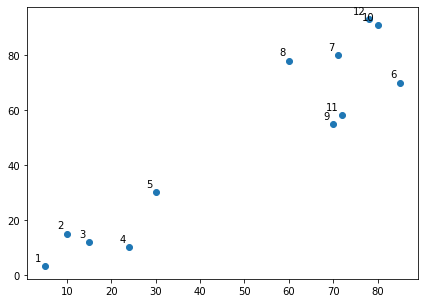

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 13)
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
        
plt.show()

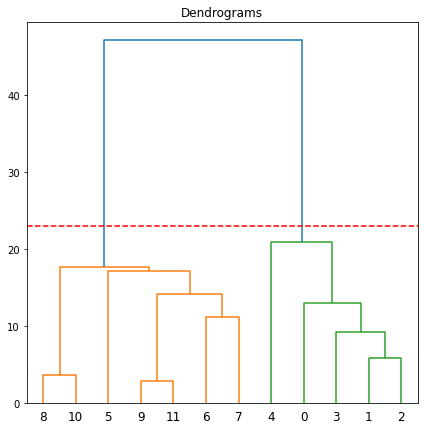

In [5]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7,7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='single'))
plt.axhline(y=23, color='r', linestyle='--')  # axhline: Add a horizontal line across the axis.

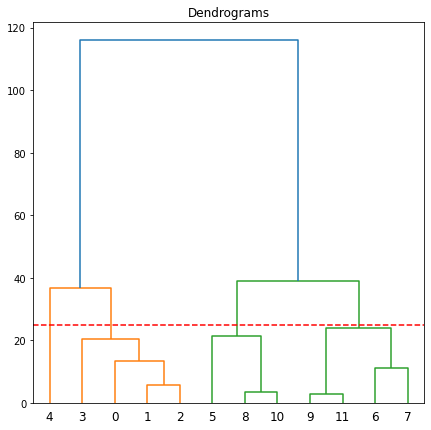

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7,7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='complete'))
plt.axhline(y=25, color='r', linestyle='--')

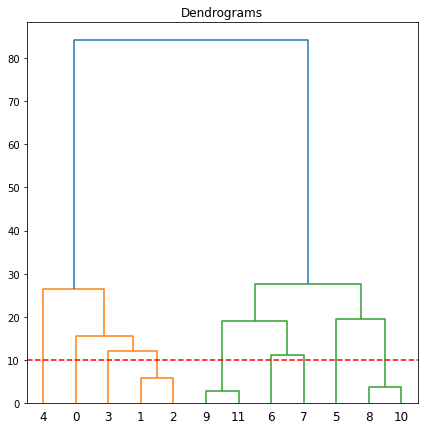

In [8]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7,7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='average'))
plt.axhline(y=10, color='r', linestyle='--')

# Basically the horizontal line is a threshold, which defines 
# the minimum distance required to be a separate cluster.
# If we draw a line further down, the threshold required to be a new cluster will be decreased 
# and more clusters will be formed as see in the image below:

In [9]:
# linkage{“ward”, “complete”, “average”, “single”}, default=”ward”
# n_clustersint or None, default=2

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
cluster.fit_predict(X)

# Ward minimizes the sum of squared differences within all clusters.
# It is a variance-minimizing approach and in this sense is similar to the k-means objective function
# but tackled with an agglomerative hierarchical approach.

array([2, 2, 2, 2, 3, 4, 0, 0, 1, 0, 1, 0], dtype=int64)

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)

array([1, 1, 1, 1, 3, 0, 2, 2, 0, 4, 0, 4], dtype=int64)

In [11]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(affinity='euclidean', linkage='average')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 3, 0, 2, 2, 0, 4, 0, 4], dtype=int64)

In [17]:
import pandas as pd
data = pd.read_csv('D:\Dataset\csvDataset\ShoppingData.csv')
print(data.shape)
data.head()
# (200, 5) which means that the dataset contains 200 records and 5 attributes.

(200, 8)


,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [18]:
data.drop(['CustomerID','CustomerGender','CustomerCity','CustomerCityID'],axis=1,inplace=True)
data.head()

,CustomerAge,AnnualIncome,CreditScore,SpendingScore
0,49,527547.58850,653,78
1,59,207143.19760,630,63
2,54,164423.84570,555,69
3,42,56220.36443,699,30
4,30,256194.36190,793,6


In [19]:
csdata = data.iloc[:,2:4].values
# print(csdata)

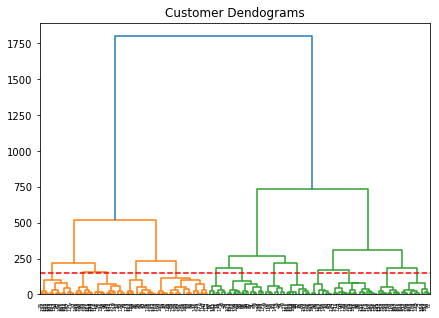

In [20]:
# scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)[source]¶
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7, 5))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(csdata, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')

# The x-axis contains the samples and y-axis represents the distance between these samples.
# The vertical line with maximum distance is the blue line and
# hence we can decide a threshold of 6 and cut the dendrogram:

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(csdata)

array([1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 0,
       2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1,
       0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 2], dtype=int64)

In [21]:
data = pd.read_csv('D:\Dataset\csvDataset\iris.csv')
print(data.shape)
data.head()

(149, 5)


,5.1,3.5,1.4,0.2,1
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1


In [22]:
csdata = data.iloc[:,1:4].values
# print(csdata)

In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(csdata)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0], dtype=int64)

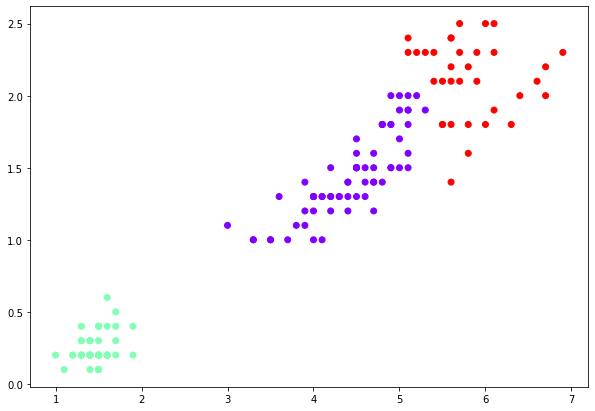

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(csdata[:,1], csdata[:,2], c=cluster.labels_, cmap='rainbow')

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster.fit_predict(csdata)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2], dtype=int64)

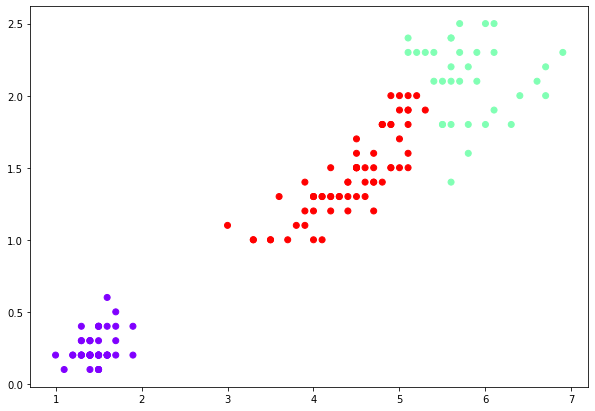

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(csdata[:,1], csdata[:,2], c=cluster.labels_, cmap='rainbow')